## Assignment - Week 3

<div>
    <img align="right" src="https://upload.wikimedia.org/wikipedia/en/e/ed/Nobel_Prize.png" width="100" ALIGN=”right” />
</div>

# Nobel Prize Data and Analysis

#### Data description

Herein, the data related to Nobel prize winners from years 1901 - 2016 are presented and analysed.

The dataset contains below written information in separate columns: 

- prize_year, 
- category, 
- prize - full description with category and year, 
- motivation, 
- prize_share,

- <details>
<summary markdown="span">etc. (click for more)</summary>
- laureate_id
- laureate_type - individual / organization
- full_name
- birth_date
- birth_city
- birth_country
- gender
- organization_name
- organization_city
- organization_country
- death_date
- death_city
- death_country
    
</details>

Dataset is described [below](#Data-Description-Using-Pandas) by using Pandas Python library.

#### Acknowledgements
- Dataset was downloaded from [kaggle.com](https://www.kaggle.com/nobelfoundation/nobel-laureates)
- Image: [wikipedia.com](https://www.google.com/url?sa=i&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FNobel_Prize&psig=AOvVaw02tGsawhsiaFMTAiBCF2Qk&ust=1590065866488000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCJjrrIy_wukCFQAAAAAdAAAAABAD)

#### Data Analysis

Data is analysed [below](#Data-Analysis-Using-Pandas) using [Pandas](https://pandas.pydata.org/) Python library.

Questions (given in Week 1 Assignment) to be answered by data analysis:

1. How many % of nobel prize laureates were women?
2. What is the most common origin (country) of nobel laureates?
3. Have there been equal count of prizes in each category awarded?
4. What are the 5 most common words in nobel prize topics?
<br><br>
----


## Data Description Using Pandas

To describe and analyse data, Pandas is used herein.

In [1]:
import pandas as pd

In [2]:
# read csv dataset
df = pd.read_csv('/home/daniela/IT_learning/Python/Pyladiesams/Pyladies_Amsterdam-Data_Analysis_Bootcamp_2020/homework_my/downloaded_data/nobel_winners.csv')

Basic decription of the _df_ dataframe done by **_head()_** and **_shape_** , **_info_**, **_columns_**:

In [3]:
df.head(2)

,prize_year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,gender,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France


In [4]:
df.shape

(969, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   prize_year            969 non-null    int64 
 1   category              969 non-null    object
 2   prize                 969 non-null    object
 3   motivation            881 non-null    object
 4   prize_share           969 non-null    object
 5   laureate_id           969 non-null    int64 
 6   laureate_type         969 non-null    object
 7   full_name             969 non-null    object
 8   birth_date            938 non-null    object
 9   birth_city            941 non-null    object
 10  birth_country         943 non-null    object
 11  gender                943 non-null    object
 12  organization_name     722 non-null    object
 13  organization_city     716 non-null    object
 14  organization_country  716 non-null    object
 15  death_date            617 non-null    ob

In [6]:
df.columns

Index(['prize_year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_id', 'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'gender', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

To show unique values of a column (here _prize_year_), **_unique()_** can be used:

In [7]:
# number of unique values
len(df.prize_year.unique()) # 113 unique year values

113

In [8]:
df.isnull().values.any()  # this dataframe contains NaN values

True

In [9]:
df.motivation.isnull().values.any()# motivation column contains NaN values

True

## Data Analysis Using Pandas

At first, some basic functions and data manipulations is shown here.


In [10]:
# number of laureates per year
laureate_per_year = pd.DataFrame(df['prize_year'].value_counts().sort_index())
laureate_per_year

,prize_year
1901,6
1902,7
1903,7
1904,6
1905,5
...,...
2012,15
2013,16
2014,15
2015,13


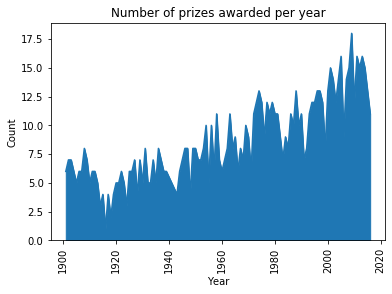

In [11]:
# showing results in bar plot
laureate_per_year_plot = laureate_per_year.plot(kind='area', rot=90, legend=False)
laureate_per_year_plot.set(xlabel="Year", ylabel="Count", title="Number of prizes awarded per year")
laureate_per_year_plot

In [12]:
# average laureates count rounded to 1 decimal
round(df['prize_year'].value_counts().mean(), 1)

8.6

In [13]:
# Maximum value of laureate_id
df["laureate_id"].max()

937

----
### Answers to given questions:

##### Question 1: How many % of nobel prize laureates were women?

In [14]:
# to count number of women the quickest way
df.gender.value_counts()

Male      893
Female     50
Name: gender, dtype: int64

In [15]:
# number of all laureates (including organizations)
total_laureates_count = df.shape[0]
total_laureates_count

969

In [16]:
# number of women
df_women = df[df.gender == "Female"]
women_count = len(df_women)
women_count

# number of men
df_men = df[df.gender == "Male"]
men_count = len(df_men)

# number of unknown gender
df_unknown_gender = df[pd.isnull(df.gender)]
unknown_gender_count = len(df_unknown_gender)

In [17]:
# are values ok?
if (women_count + men_count + unknown_gender_count) == total_laureates_count:
    print("yess!!")


yess!!


In [18]:
#counting percentages
percentage_of_women = women_count / total_laureates_count * 100
percentage_of_men = men_count / total_laureates_count * 100
percentage_of_unknown = unknown_gender_count / total_laureates_count * 100

#pri ting results
print(f"Percentage of women Nobel prize laureates: {round(percentage_of_women, 1)} %")
print(f"(Percentage of men Nobel prize laureates: {round(percentage_of_men, 1)} %)")
print(f"(Percentage of unknown Nobel prize laureates: {round(percentage_of_unknown, 1)} %)")

Percentage of women Nobel prize laureates: 5.2 %
(Percentage of men Nobel prize laureates: 92.2 %)
(Percentage of unknown Nobel prize laureates: 2.7 %)


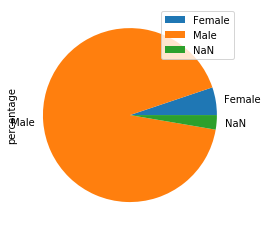

In [19]:
# showing pie plot
import matplotlib

percentage = pd.DataFrame({"percentage":[percentage_of_women, percentage_of_men, percentage_of_unknown]}, index=["Female", "Male", "NaN"])
percentage_pie = percentage.plot.pie(y="percentage")


##### Question 2: What is the most common origin (country) of nobel laureates?

In [20]:
# counting values, accesing first index and value
print(df.birth_country.value_counts().index[0])
print(df.birth_country.value_counts()[0])

United States of America
276


#### Question 3: Have there been equal count of prizes in each category awarded?

In [21]:
# counting values in each category, putting to dataframe with index
cat_no = pd.DataFrame(df.category.value_counts())

#answering, if values are equal
print("Equal prizes in each category?")

if cat_no.category[0] == cat_no.category[1] == cat_no.category[2] == cat_no.category[3] == cat_no.category[4] == cat_no.category[5]:
    print("Yes")
else:
    print("No")

# printing results
print(cat_no)

Equal prizes in each category?
No
            category
Medicine         227
Physics          222
Chemistry        194
Peace            130
Literature       113
Economics         83


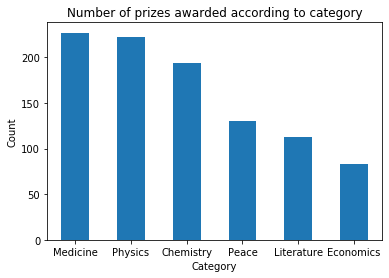

In [22]:
# showing results in bar plot
cat_no_bar = cat_no.plot.bar(rot=0, legend=False)
cat_no_bar.set(xlabel="Category", ylabel="Count", title="Number of prizes awarded according to category")
cat_no_bar

#### Question 4: What are the 5 most common words in nobel prize topics?

In [23]:
# creating list from motivations
mot_list = list(df.motivation)

# auxiliary variables
words_list = []
words_dict = {}
unwanted = ["with", "their", "this", "which", "after"]

def create_list_of_words_in_motivation(mot_list):
    """Splits the titles in motivation column from df 
    dataset into list of words, removes unwanted characters"""
    
    for title in mot_list:
        if type(title) == str:
            words_in_title = title.split(" ")     

            for w in words_in_title:
                w = w.replace(' ', '')
                w = w.replace('"', '')
                w = w.replace(',', '')
                w.lower()
                if len(w)>3:
                    if w not in unwanted:
                        words_list.append(w)
                continue
    return words_list


def count_words(words_list, words_dict):
    """Counts the words in motivation titles, 
    creates a dictionary"""
    for w in words_list:
        if w not in words_dict.keys():
            count = words_list.count(w)
            words_dict[w] = count
        else:
            continue

    return words_dict         


words_list = create_list_of_words_in_motivation(mot_list)
words_dict = count_words(words_list, words_dict)

# showing result
mot_df = pd.DataFrame.from_dict(words_dict, orient="index")
mot_df.sort_values(by=[0], ascending=False).head(5)

,0
discovery,206
discoveries,164
concerning,124
development,111
work,95


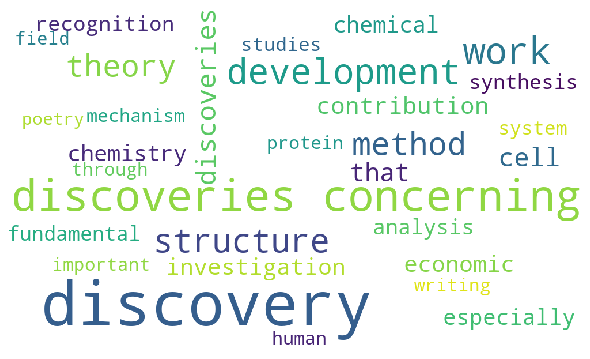

In [24]:
# create worldcloud image according of word counts
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

mot_string = ''
mot_string += " ".join(words_list)+" "

wordcloud = WordCloud(width = 1000, height = 600, 
                background_color ='white',
                max_words=30,
                stopwords = unwanted, 
                min_font_size = 10).generate(mot_string)

# plot the WordCloud image                        
plt.figure(figsize = (8, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)  
plt.show()